### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder as ohe
import warnings
warnings.simplefilter(action='ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.shape

(12684, 26)

In [6]:
data.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

<h2 style="color:red">Data Cleaning starts here....</h2>

<p style="color:blue">2.1 Analyzed the columns values with type object. The following columns were treated:</p>
<p style="color:blue">a) Fixed the age values and converted it to numeric</p>
<p style="color:blue">b) Shortened the occupation, education, and coupon column values</p>
<p style="color:blue">c) converted the columns (Bar,CarryAway,CoffeeHouse,RestaurantLessThan20, Restaurant20To50) values and converting them to numeric'</p>
<p style="color:blue">d) Converted the expiration column to numeric in hours</p>
<p style="color:blue">e) Fixed the income column and converting the values to numeric (taking the average)</p>
<p style="color:blue">f) Fixed the typo in passenger column name 
<p style="color:blue">g) Treatment of the missing and duplicate data

In [7]:
# Printing the unique categorical data for columns with type object
data.apply(lambda column: column.unique() if column.dtype == 'object' else None).dropna()  

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $49999, $62500 - $74999, $12500 - $2...
car                     [nan, Scooter and motorcycle, crossover, Mazda...
Bar                                   

In [8]:
# Replacing 50plus with 51 and below21 with 20. Converting column age type to int.
data['age'] = data['age'].str.replace("50plus", '51').str.replace("below21", '20')
data['age'] = pd.to_numeric(data['age'])
data['age'].unique()
data['age'].dtypes

dtype('int64')

In [9]:
#Shortining the occupation categorical values by  replacing them from a dictionary
dict = {'Architecture & Engineering':'ArchEng', 'Education&Training&Library':'EduTrainLib', 'Healthcare Support':'HealthSup'\
       , 'Healthcare Practitioners & Technical':'HealthPractTech', 'Sales & Related':'Sales'\
       , 'Arts Design Entertainment Sports & Media':'ArtDesEntSprtMed', 'Computer & Mathematical':'CompMath'\
      , 'Life Physical Social Science':'LifPhySoSc', 'Personal Care & Service':'PerCareSrv', 'Community & Social Services':'ComSoSc'\
       , 'Office & Administrative Support':'OffcAdmSup', 'Construction & Extraction':'ConstExt', 'Installation Maintenance & Repair':'InstMainRep'\
       , 'Transportation & Material Moving':'TransMatMov', 'Business & Financial':'BusFin', 'Protective Service':'ProtSrv'\
      , 'Food Preparation & Serving Related':'FoodPrepServ', 'Production Occupations':'ProdOccup'\
       , 'Building & Grounds Cleaning & Maintenance':'BldGrdClnMnt', 'Farming Fishing & Forestry':'FarmFshForst' }
data['occupation'].replace(dict, inplace = True)
data['occupation'].unique()

array(['Unemployed', 'ArchEng', 'Student', 'EduTrainLib', 'HealthSup',
       'HealthPractTech', 'Sales', 'Management', 'ArtDesEntSprtMed',
       'CompMath', 'LifPhySoSc', 'PerCareSrv', 'ComSoSc', 'OffcAdmSup',
       'ConstExt', 'Legal', 'Retired', 'InstMainRep', 'TransMatMov',
       'BusFin', 'ProtSrv', 'FoodPrepServ', 'ProdOccup', 'BldGrdClnMnt',
       'FarmFshForst'], dtype=object)

In [10]:
#Shortining the Education categorical values by  replacing them from a dictionary
dict = {'Some college - no degree': 'Some college', 'Bachelors degree': 'Bach degree', 'Associates degree':'Assoc degree', 'Graduate degree (Masters or Doctorate)':'Grad degree', 'Some High School':'Some Schl', 'High School Graduate':'High Schl'}
data['education'].replace(dict, inplace = True)

In [11]:
# Converting the Bar, CarryAway, CoffeeHouse, RestaurantLessThan20 and Restaurant20To50 values to numeric by mapping the strings first

dict = {'never':0, 'less1':1, '1~3':2, 'gt8':9, '4~8':4}
list(map(lambda column: data.replace({column:dict},inplace=True), ['Bar', 'CarryAway','CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50']));

#Printing the converted columns values
list(map(lambda column: print (column ,"data: ", data[column].unique()), ['Bar', 'CarryAway','CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50']));

Bar data:  [ 0.  1.  2.  9. nan  4.]
CarryAway data:  [nan  4.  2.  9.  1.  0.]
CoffeeHouse data:  [ 0.  1.  4.  2.  9. nan]
RestaurantLessThan20 data:  [ 4.  2.  1.  9. nan  0.]
Restaurant20To50 data:  [ 2.  1.  0.  9.  4. nan]


In [12]:
#Shortining the coupon categorical values by  replacing them from a dictionary
dict = {'Restaurant(<20)': 'CheapRest', 'Coffee House': 'CoffeeHouse', 'Carry out & Take away':'CarryOut', 'Restaurant(20-50)':'ExpvRest'}
data['coupon'].replace(dict, inplace = True)

In [13]:
#Converting the expiration date to hours
data['expiration'] = data['expiration'].str.replace("2h", "2").str.replace("1d", "24")
data['expiration'] = pd.to_numeric(data['expiration'])
data['expiration'].value_counts()

expiration
24    7091
2     5593
Name: count, dtype: int64

In [14]:
#Convert the income to numeric by taking the average
data['income'] = data['income'].str.replace("$"," ").str.replace("-", " ").str.replace(" ", "")\
                                .str.replace ("Lessthan12500", "12499")\
                                .str.replace ("1250024999", "18750")\
                                .str.replace ("2500037499", "31250")\
                                .str.replace ("3750049999", "43750")\
                                .str.replace ("5000062499", "56250")\
                                .str.replace ("6250074999", "68750")\
                                .str.replace ("7500087499", "81250")\
                                .str.replace ("8750099999", "93750")\
                                .str.replace ("100000orMore", "100000")
data['income'] = pd.to_numeric(data['income'])
data['income'].value_counts()    

income
31250     2013
18750     1831
43750     1805
100000    1736
56250     1659
12499     1042
93750      895
81250      857
68750      846
Name: count, dtype: int64

In [15]:
#Corrrecting the Passenger column name
data.rename(columns = {'passanger': 'passenger'}, inplace = True)
type(data['passenger'])

pandas.core.series.Series

2.2 Checking the missing values

In [16]:
# Analysing the missing values

data.isnull().sum().sort_values(ascending = False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passenger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

<h3 style="color:red">Missing values and duplicate treatment strategy</h3>
<p style = "color:blue">All missing values are from columns with type object/string.  the column cars is missing about 99% of the data, it was decided to drop it.  the other columns (Bar, CoffeeHouse, CarryAway, ResuarantLessThan20 and Restaurant20To50) are missing about 1% of their values, so dropping the missing rows should not impact the data analysis, hence were dropped.  The duplicates were dropped</p>

In [17]:
#Dropping the car column
data.drop('car', axis=1, inplace=True)

#Dropping the missing rows from Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)
print(data.isnull().sum())
data.shape

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


(12079, 25)

In [18]:
#Check Duplicates
data.duplicated().sum()

72

In [19]:
#Drop the duplicates
data.drop_duplicates(inplace = True)
data.shape
data.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,CheapRest,24,Male,21,Single,...,1.0,4.0,4.0,1.0,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,CoffeeHouse,2,Male,21,Single,...,1.0,4.0,4.0,1.0,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,1.0,4.0,4.0,1.0,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,CarryOut,2,Male,21,Single,...,1.0,4.0,4.0,1.0,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,CoffeeHouse,24,Male,21,Single,...,1.0,4.0,4.0,1.0,1,0,0,0,1,0


<h3 style="color:red"> Data Exploration Starts here ...</h3> 
<p style ="color:blue">Note:  All the calculations in this section and in the Bar coupon investigation section were computed based on the total observations (total participants)<p>

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
total_participants = data.shape[0]
total_accepted_prop = round(data.query('Y == 1')["Y"].sum()/total_participants,3)
print(total_accepted_prop) 

0.568


<h4 style="color:red"> Answer to DE-Q4</h4> 
<p style="color:blue"> The proportion of the total observations who chose to accept the coupon is ($56.8$%)</p> 

5. Use a bar plot to visualize the `coupon` column.

In [21]:
#Creating new DF called grp_coupon using groupby on coupon
grp_coupon = data.groupby('coupon')[['Y']].count().reset_index().sort_values(by =['Y'], ascending = False)
grp_coupon.rename(columns= {'Y':'Participants'}, inplace =True)
grp_coupon

,coupon,Participants
3,CoffeeHouse,3809
2,CheapRest,2646
1,CarryOut,2233
0,Bar,1906
4,ExpvRest,1413


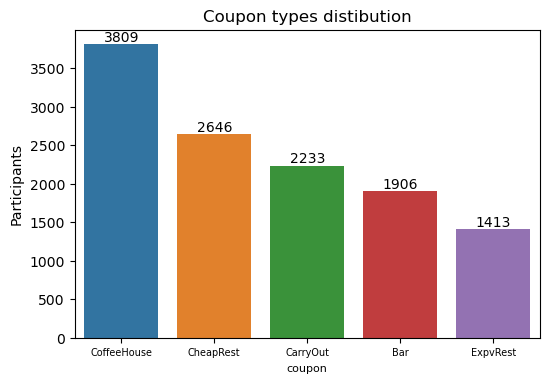

In [22]:
plt.figure(figsize = (6,4))
plt.xticks(fontsize = 7)
plt.title('Coupon types distibution')
plt.xlabel('coupon', fontsize = 8)
ax = sns.barplot(data = grp_coupon, x= 'coupon', y = 'Participants', hue = 'coupon');
for con in ax.containers:
    ax.bar_label(con)
plt.savefig('images/couponTypesDistribution.png')


<h4 style="color:red"> Answer to DE-Q5</h4> 
<p style="color:blue"> The above bar diagram shows that the Coffee House coupon had the most observations/participants count and the Restaurant(20-50) coupon had the least number of observations/participants.  Please note that this diagram does not show the percentage of acceptance/rejection of the coupon), instead it is shown in the below histogram which tells us the following about the coupon:
<p style="color:blue">1) Coffee house has the highest rejection rate of ($16$%) and highest acceptance rate of ($15.72$%).</p>
<p style="color:blue">2) Restaurant(<20)/Cheap coupon is 2nd with acceptance rate of ($15.64$%) and rejection rate of ($6.4$%)</p>
<p style="color:blue">3) Carry Out coupon was the 3rd with acceptance rate of ($13.68$%) and has the least rejection rate of ($4.92$%)</p>
<p style="color:blue">4) Bar coupon comes in number 4 of acceptance rate of ($6.54$%) and rejection rate of ($9.31$%)</p>
<p style="color:blue">5) Restaurant(20-50) is last with acceptance rate of ($5.25$%) and rejection rate of ~($6.50$%)</p>
                     
                                               

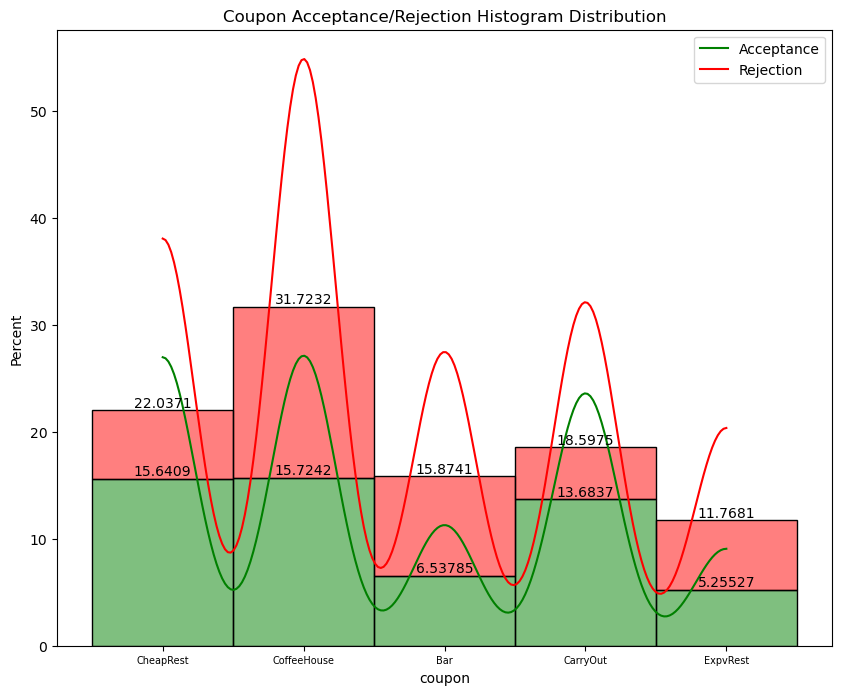

In [23]:
plt.figure(figsize = (10,8))
plt.xticks(fontsize = 7)
plt.title('Coupon Acceptance/Rejection Histogram Distribution')
ax = sns.histplot(data, x= 'coupon', hue = 'Y', bins = 5, kde = True, multiple = 'stack', stat = 'percent', legend = False, palette = sns.color_palette(['red','green']));
plt.legend(["Acceptance", "Rejection"]);
for con in ax.containers:
    ax.bar_label(con)
plt.savefig('images/couponAcceptanceRejectionHistogram.png')

6. Use a histogram to visualize the temperature column.

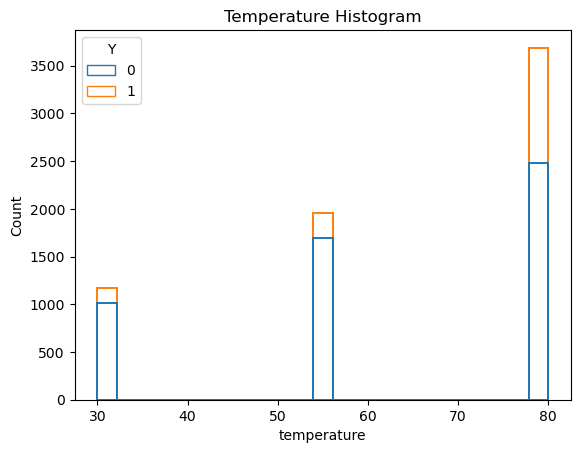

In [24]:
#Plotting the temperature histogram
sns.histplot(data, x = 'temperature', hue = 'Y', fill = False )
plt.title('Temperature Histogram')
plt.tight_layout = True
plt.savefig('images/temperatureHistogram.png')

<h4 style="color:red"> Answer to DE-Q6</h4> 
<p style="color:blue"> The temperature histogram shows that the coupon was best accepted when the temperature was around 80F and least accepted when the temperature around 30F

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


<h3 style="color:red"> Bar Coupon (BC) Exploration</h3> 
<p style="color:blue"> The BC Dataframe was computed by filtering the dataframe for the bar coupon and then selecting the coupon column. 

In [25]:
#Filtering the coupon column in data for Bar value using [] and selecting the coupon column
bar_coupon_df = data[data['coupon'] == "Bar"][['coupon']]
print (type(bar_coupon_df))
bar_coupon_df

<class 'pandas.core.frame.DataFrame'>


,coupon
24,Bar
35,Bar
39,Bar
46,Bar
57,Bar
...,...
12663,Bar
12664,Bar
12667,Bar
12670,Bar


2. What proportion of bar coupons were accepted?


In [26]:
#sum the 1's in bar_coupon_df Y column and devide by the total participants (after dropped the missing rows)
# suming the 1's in Y is equivalent to checking if Y == 1 and take the count
bar_ans2 = round(data[data['coupon']=="Bar"]["Y"].sum() /total_participants, 4)
print(bar_ans2) 


0.0654


<h4 style="color:red"> Answer to BC-Q2</h4> 
<p style="color:blue">The proportion of bar coupons accepted is ($6.54$%)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
# go to bar 3 or fewer times
bar_ans31 = round(data.query('coupon == "Bar" & Bar <= 2' )['Y'].sum() / total_participants*100,2)
print(bar_ans31)

5.31


In [28]:
# go to the bar more than 3
bar_ans32 = round(data.query('coupon == "Bar" & Bar > 2' )['Y'].sum() / total_participants*100,2)
print(bar_ans32)

1.22


<h4 style="color:red"> Answer to BC-Q3</h4> 
<p style="color:blue">The acceptance rate of the Bar coupon by those  who went to a bar 3 or fewer times a month is ($5.31$%) which is about ($4.3$) times higher than the rate of who went to a bar more than 3 times a month.  The criteria of both questions are compliment to each other and their combined rate of acceptance equals to the total acceptance of the Bar coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
#copmuting acceptance rate for who visited a bar 1more and age gt25 
bar_ans41 = round(data.query('coupon == "Bar"& Bar > 1 & age > 25')['Y'].sum()/total_participants*100,2)
print (bar_ans41)

2.32


In [30]:
#Computing acceptance rate for all others
bar_ans42 = round(data.query('coupon == "Bar"')['Y'].sum()/total_participants*100 - bar_ans41, 2)
print (bar_ans42)

4.22


<h4 style="color:red"> Answer to BC-Q4</h4> 
<p style="color:blue">Yes they are different.  The acceptance rates of both questions are compliment to each other with all others rate is almost double.  Both rates are added to the total acceptance rate of the Bar coupon of ($6.54$%)</p>

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [31]:
#copmuting who visited a bar 2more and have non kid passengers 
bar_ans51 = round(data.query('coupon == "Bar" & Bar > 1 & passenger != "Kid(s)"')['Y'].sum()/total_participants*100,2)
print (bar_ans51)

3.13


In [32]:
#copmuting who visited a bar 2more and and their occupation not farming, fishing or forestry
bar_ans52 = round(data.query('coupon == "Bar" & Bar > 1 & occupation != "FarmFshForst"')['Y'].sum()/total_participants*100, 2)
print (bar_ans52)

3.26


<h4 style="color:red"> Answer to BC-Q5</h4> 
<p style="color:blue">The acceptance rates for both criteria in the questions are very close to each others with a margin of difference $=(0.13$%) 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [33]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_ans61 = round(data.query('coupon == "Bar" & Bar > 1 & passenger != "Kid(s)" & maritalStatus != "Widowed"')['Y'].sum()/total_participants*100, 2)
print(bar_ans61)

3.13


In [34]:
# go to bars more than once a month and are under the age of 30
bar_ans62 = round(data.query('coupon == "Bar" & Bar > 1 & age < 30')['Y'].sum()/total_participants*100, 2)
print(bar_ans62)

1.97


In [35]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
bar_ans63 = round(data.query('coupon == "Bar" & RestaurantLessThan20 >= 4 & income < 50000')['Y'].sum()/total_participants*100, 2)
print(bar_ans63)

1.27


<h4 style="color:red"> Answer to BC-Q6</h4> 
<p style="color:blue">The acceptance rate of the first question criteria (went to a bar more than 1 time, and had a non kid passenger) is ($3.13$%) which is almost equal to the acceptance rate of the other 2 questions criteria combined.</p>
<p style="color:blue">The acceptance rate of the last question criteria (went to a cheap restaurant four or more times and income less than $50K$ is the lowest of the 3 questions </p>

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<h4 style="color:red"> Answer to BC-Q7</h4>  
<p style="color:blue">My hypothesize about the Bar coupon acceptance is like this:  
<p style="color:blue">1) The drivers who went to a bar 3 times or less a month were more likey to accept the coupon than all other questions criteria
<p style="color:blue">2) The drivers who went to a bar once or less or their age is 25 years old or younger were 2nd likely to accept the coupon than the remained questions criteria
<p style="color:blue">3) The drivers who went to a bar more than once, are not widowed and had non kid passengers were 3rd likely to accept the coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<h3 style="color:red"> Further Analysis of the other Coupon Types</h3>  
<p style="color:blue">I have put a strategy to explore the dependency patterns on the coupon acceptance/rejection decisions based on the derivers' characteristics: 
<p style="color:blue">1) Studied the dataset distribution
<p style="color:blue">2) Applied OneHotCoding technique on the coupon column and converted its categorical values to binary/integers.
<p style="color:blue">3) Looked at the correlation between the numeric columns
<p style="color:blue">4) Explored through visualization all type of driver characteristic features like (age, income, occupation, education, gender, passengers, marital status ...etc.) that may impact the driver decision.
    


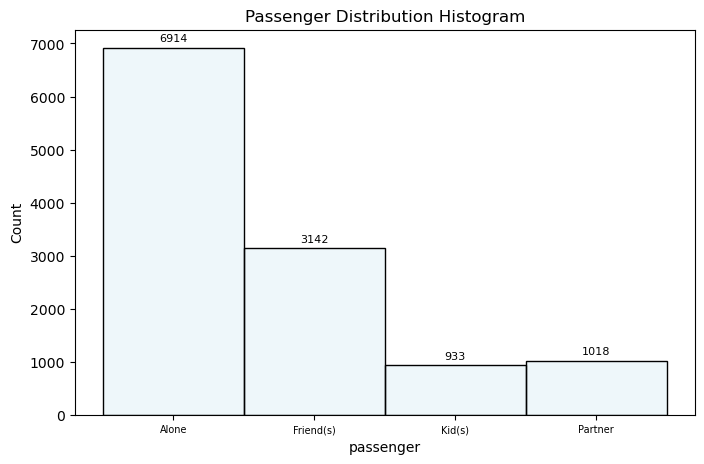

In [36]:
#Data Passenger destribution
fig, ax = plt.subplots(figsize = (8,5))
sns.histplot(data['passenger'], alpha = .2, color = 'lightblue');
plt.xticks(fontsize  = 7);
for cont in ax.containers:
    labels = [f'{h:0}' if (h:= val.get_height()) != 0 else '' for val in cont]
    ax.bar_label(cont, labels=labels, fontsize=8, padding=3)
ax.set_title('Passenger Distribution Histogram');
plt.savefig('images/PassengerDistributionHistogram.png')

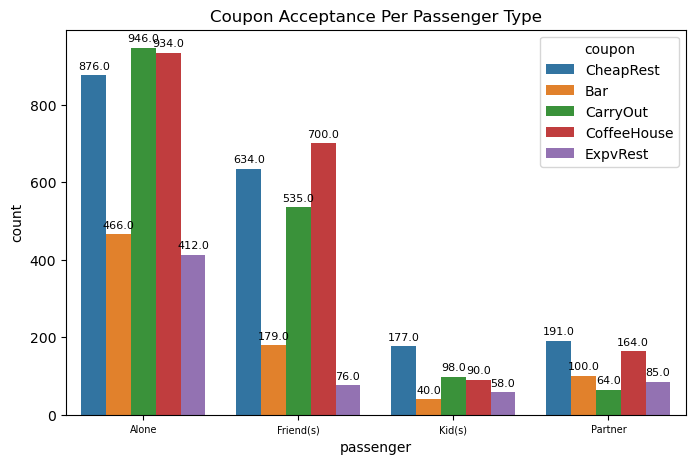

In [37]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(data.query('Y == 1'), x = 'passenger',hue = 'coupon');
plt.xticks(fontsize  = 7);
for cont in ax.containers:
    labels = [f'{h:0}' if (h:= val.get_height()) != 0 else '' for val in cont]
    ax.bar_label(cont, labels=labels, fontsize=8, padding=3)
ax.set_title('Coupon Acceptance Per Passenger Type');
plt.savefig('images/CouponAcceptancePerPassengerType.png')

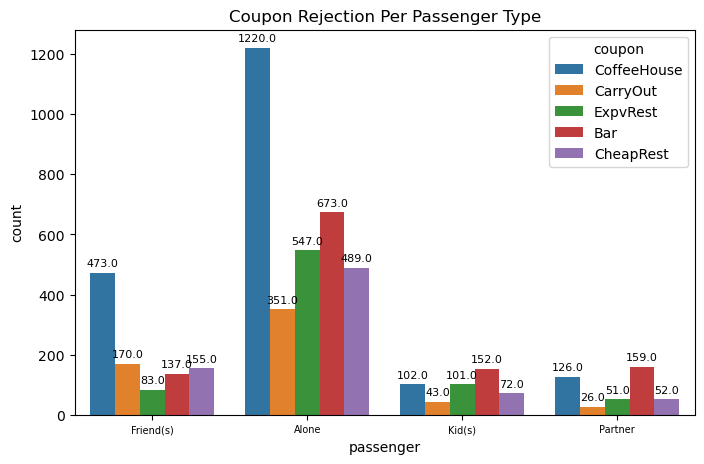

In [38]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(data.query('Y == 0'), x = 'passenger',hue = 'coupon');
plt.xticks( fontsize  = 7);
for cont in ax.containers:
    labels = [f'{h:0}' if (h:= val.get_height()) != 0 else '' for val in cont]
    ax.bar_label(cont, labels=labels, fontsize=8, padding=3)
ax.set_title('Coupon Rejection Per Passenger Type');
plt.savefig('images/CouponRejectionPerPassengerType.png')

In [39]:
#Applied OneHotEncoding using Pandas get_dummier on the coupon column.  Created new dataframe with all enumeric columns
encoded_coupon = pd.get_dummies(data, columns =['coupon'], dtype = int )
enum_data = encoded_coupon[['expiration', 'age', 'coupon_Bar','coupon_CarryOut', 'coupon_CoffeeHouse', 'coupon_ExpvRest', 'coupon_CheapRest','direction_opp', 'direction_same', 'toCoupon_GEQ25min','toCoupon_GEQ15min', 'toCoupon_GEQ5min', 'Y', 'income', 'temperature', 'has_children'  ]]
enum_data 
                        

,expiration,age,coupon_Bar,coupon_CarryOut,coupon_CoffeeHouse,coupon_ExpvRest,coupon_CheapRest,direction_opp,direction_same,toCoupon_GEQ25min,toCoupon_GEQ15min,toCoupon_GEQ5min,Y,income,temperature,has_children
22,24,21,0,0,0,0,1,1,0,0,0,1,1,68750,55,0
23,2,21,0,0,1,0,0,1,0,0,0,1,0,68750,80,0
24,24,21,1,0,0,0,0,1,0,0,0,1,1,68750,80,0
25,2,21,0,1,0,0,0,1,0,0,1,1,0,68750,80,0
26,24,21,0,0,1,0,0,1,0,0,0,1,0,68750,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,24,26,0,1,0,0,0,0,1,0,0,1,1,81250,55,0
12680,24,26,0,1,0,0,0,1,0,0,0,1,1,81250,55,0
12681,24,26,0,0,1,0,0,0,1,0,0,1,0,81250,30,0
12682,24,26,1,0,0,0,0,1,0,1,1,1,0,81250,30,0


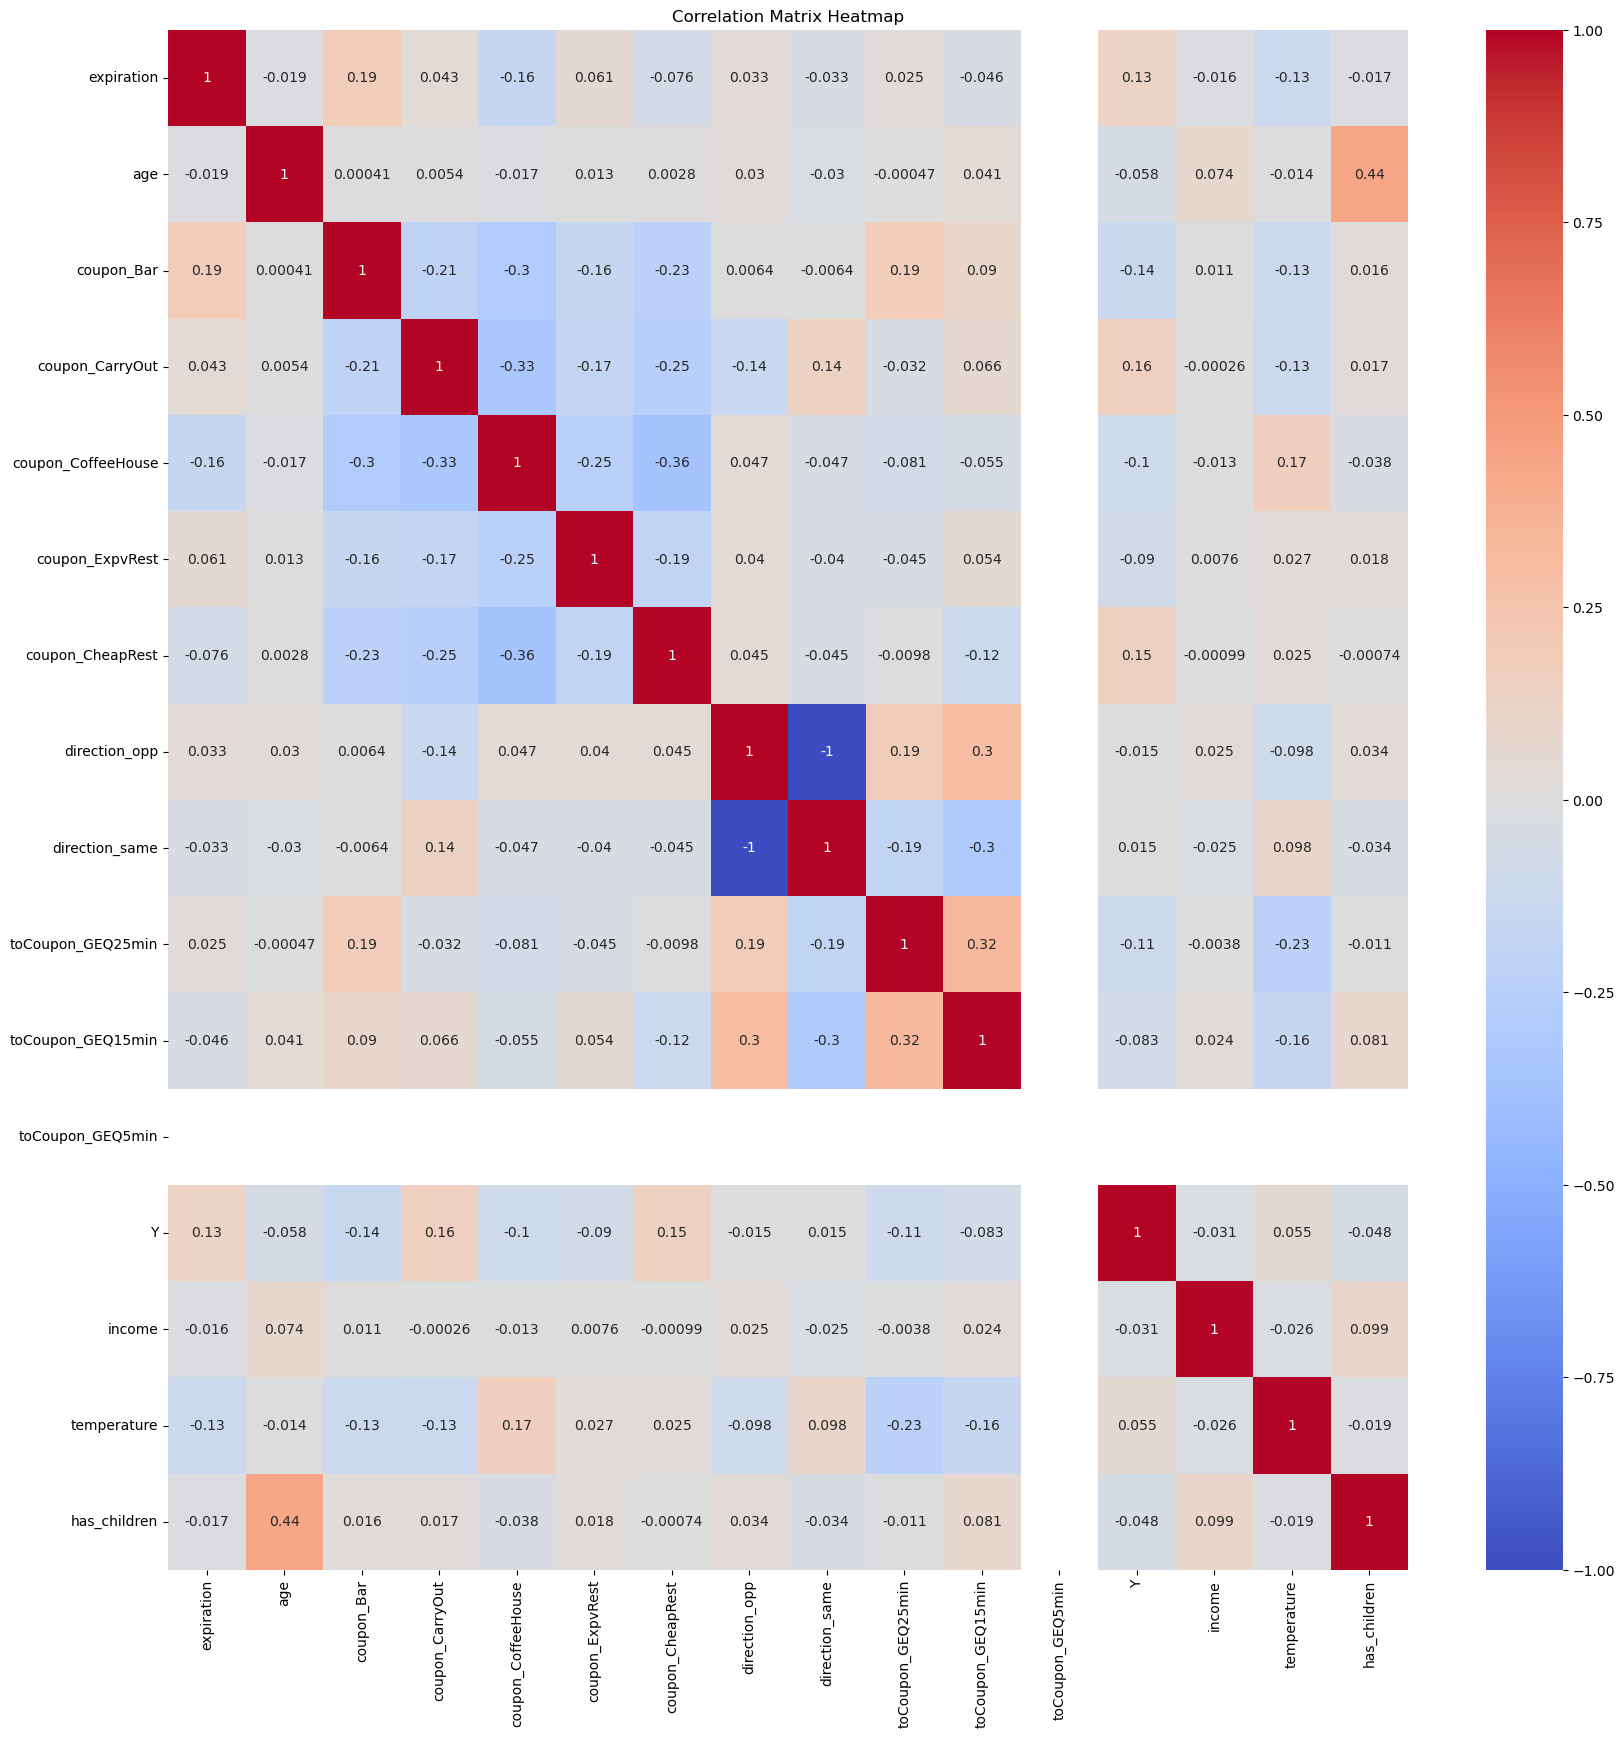

In [60]:
#Correlation matrix and heatmap  
fig, ax = plt.subplots(figsize = (20,20))
corr = enum_data.corr(numeric_only=True)
corr
sns.heatmap(corr, annot=True, center = 0, vmin = -1, vmax = 1, cmap = 'coolwarm');
plt.title('Correlation Matrix Heatmap')
plt.savefig('images/couponCorrHeatmap.png')


<h4 style="color:red"> Heatmap Anaylisis</h4>  
<p style="color:blue">Since this is a classification use case, there is no significant correlation between the coupon acceptance/rejection represented by the Y column and the other features.  It was noticed that there is a 100% negative correlation between the same direction and opossite direction of the shop destination.  However, this does not impact the driver decision om whether to accept or reject the coupon.   

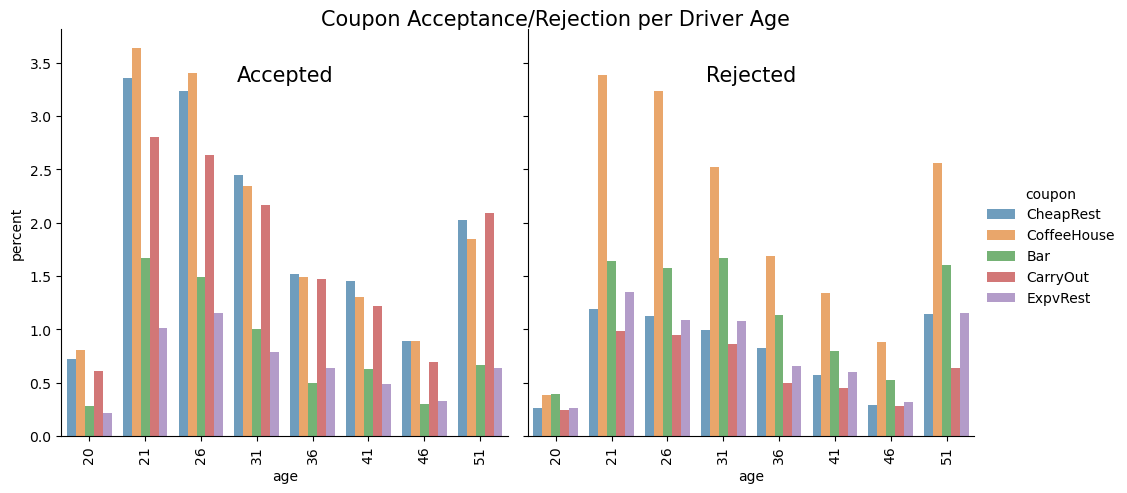

In [41]:
g = sns.catplot(data,x = 'age', col = 'Y', kind = "count", stat = 'percent',col_order = (1, 0), col_wrap = 2,hue = 'coupon', alpha = .7);
g.fig.suptitle( 'Coupon Acceptance/Rejection per Driver Age\n', x = .5, y = .97, fontsize = 15);
g.set_xticklabels(rotation=90);
for ax, title in zip(g.axes.flat, ['Accepted', 'Rejected']):
    ax.set_title(title, fontsize = 15, x = .5, y = .85)
plt.savefig('images/couponAccptRejAge.png')


<h4 style="color:red"> Drivers' Age Impact Analysis</h4>  
<p style="color:blue"> From the catplot diagram, most of the drivers who accepted/rejected a coupon were between the age of 21 to 31 and it spikes again for the age greater than 50.  The Coffee House coupon was the most to be accepted/rejected.  The cheap restaurant < $20 was more likely to be selected after the Coffee house followed by the Carry out coupon.   

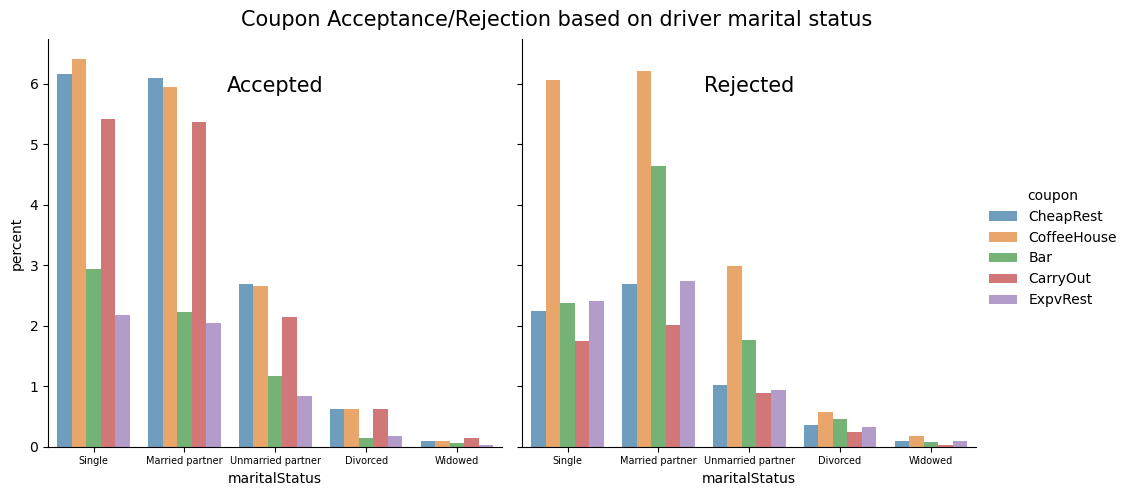

In [42]:
g = sns.catplot(data,x = 'maritalStatus', col = 'Y', kind = "count", stat = 'percent',col_order = (1, 0), col_wrap = 2,hue = 'coupon', alpha = .7);
g.fig.suptitle( 'Coupon Acceptance/Rejection based on driver marital status\n', x = .5, y = .99, fontsize = 15);
g.set_xticklabels(fontsize = 7);
for ax, title in zip(g.axes.flat, ['Accepted', 'Rejected']):
    ax.set_title(title, fontsize = 15, x = .5, y = .85)
plt.savefig('images/couponAccptRejMaritalStatus.png')


<h4 style="color:red"> Drivers' Marital Status Impact Analysis</h4>  
<p style="color:blue"> The accepted diagram shows the single and married partner were the most to accept the Coffee House, cheap restaurant(<20) and Carry our coupons respectively.  The rejected diagram shows the same driver pattern as the accepted case to reject the Coffee House coupon with almost the same rate.  Also, it shows the married partner were rejecting the Bar coupon with a rate close to ($4.6$%).  

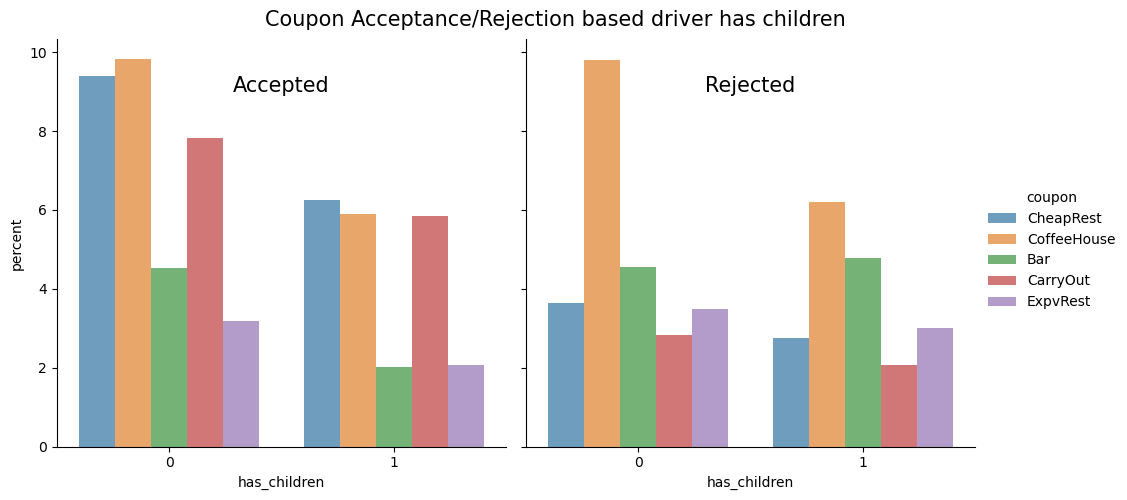

In [43]:
g = sns.catplot(data,x = 'has_children', col = 'Y', kind = "count", stat = 'percent',col_order = (1, 0), col_wrap = 2,hue = 'coupon', alpha = .7);
g.fig.suptitle( 'Coupon Acceptance/Rejection based driver has children\n', x = .5, y = .99, fontsize = 15);
for ax, title in zip(g.axes.flat, ['Accepted', 'Rejected']):
    ax.set_title(title, fontsize = 15, x = .5, y = .85)
plt.savefig('images/couponAccptRejHasChildren.png')

<h4 style="color:red"> Drivers' with/out Chidren Impact Analysis</h4>  
<p style="color:blue">The catplot diagram shows that close to ($10$%) of the drivers who don't have children were more likely to select the Coffee House and cheap restaurant coupons.  About ($8$%) of the same pattern were more likely to accept the Carry out coupon.  Also, about ($10$%) from the same pattern were more likely to reject the Coffee House coupon.

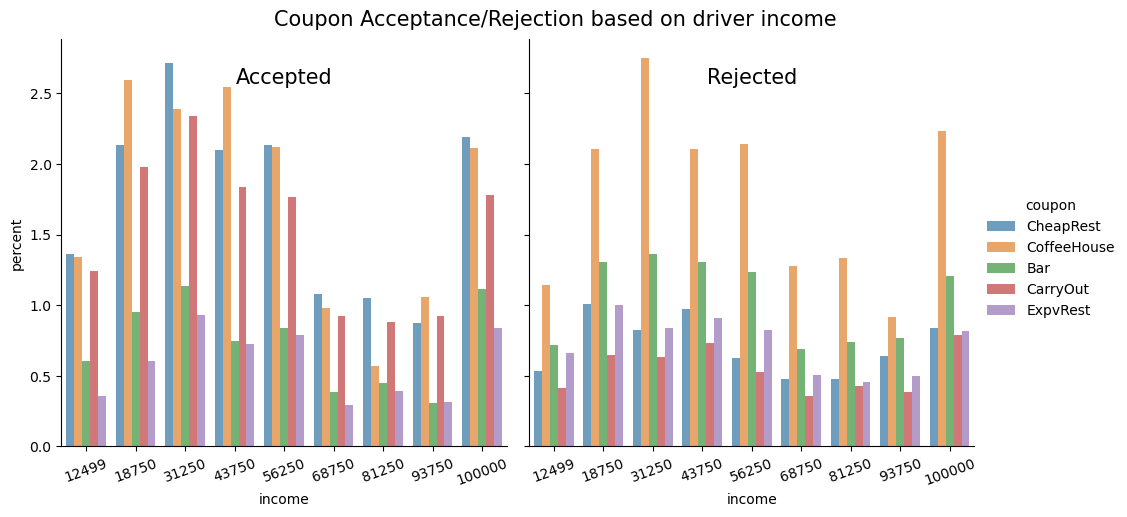

In [44]:
g = sns.catplot(data,x = 'income', col = 'Y', kind = "count", stat = 'percent',col_order = (1, 0), col_wrap = 2,hue = 'coupon', alpha = .7);
g.fig.suptitle( 'Coupon Acceptance/Rejection based on driver income\n', x = .5, y = .99, fontsize = 15);
g.set_xticklabels(rotation=20);
g.set_xlabels(fontsize = 10)
for ax, title in zip(g.axes.flat, ['Accepted', 'Rejected']):
    ax.set_title(title,fontsize = 15, x = .5, y = .87)
plt.savefig('images/couponAccptRejIncome.png')

<h4 style="color:red"> Drivers' income Impact Analysis</h4>  
<p style="color:blue">From the diagram we can see that the drivers with average income between ($18K$)  and  ($56K$) and above ($100K$) were more likely to accept the cheap restaurant, Coffee House and Carry out coupons.  The drivers with the same pattern as the acceptance case were more likely to reject the Coffee House coupon.   

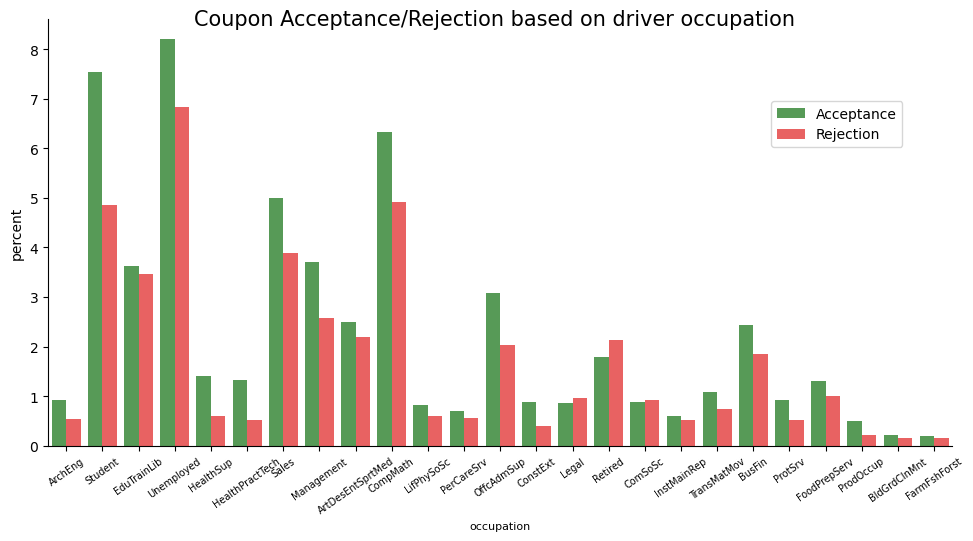

In [45]:
g = sns.catplot(data,x = 'occupation', kind = 'count', legend = False, stat = 'percent', height = 5, aspect = 2, hue_order = (1,0), hue = 'Y', alpha = 0.7, palette = sns.color_palette(['green','red']));
plt.suptitle( 'Coupon Acceptance/Rejection based on driver occupation', x = .5, y = .99, fontsize = 15);
g.set_xticklabels(rotation=35, fontsize = 7);
g.set_xlabels(fontsize = 8, x = .5)
plt.legend(["Acceptance", "Rejection"], loc = (.8,.7));
plt.savefig('images/couponAccptRejOccupation.png')

<h4 style="color:red"> Drivers' Occupation Impact Analysis</h4>  
<p style="color:blue">The catplot/count percentage shows that the unemployed, students and drivers who work in the Computer and Math fields have the highest acceptance rate of a coupon with an average about ($7.3$%)  

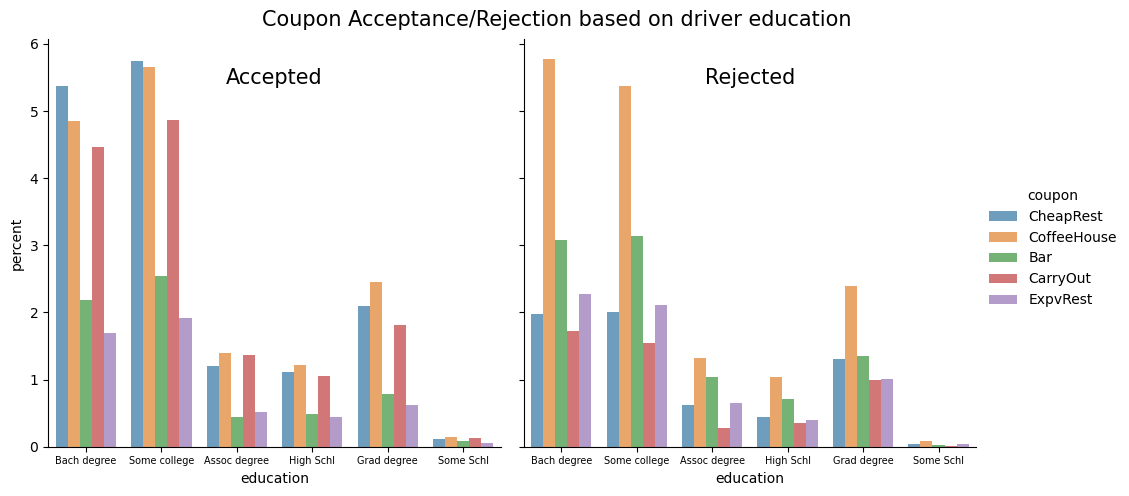

In [46]:
g = sns.catplot(data,x = 'education', col = 'Y', kind = "count", stat = 'percent',col_order = (1, 0), col_wrap = 2,hue = 'coupon', alpha = .7);
g.fig.suptitle( 'Coupon Acceptance/Rejection based on driver education\n', x = .5, y = .99, fontsize = 15);
g.set_xticklabels(fontsize = 7);
for ax, title in zip(g.axes.flat, ['Accepted', 'Rejected']):
    ax.set_title(title, fontsize = 15, x = .5, y = .87)
plt.savefig('images/couponAccptRejEducation.png')

<h4 style="color:red"> Drivers' Education Impact Analysis</h4>  
<p style="color:blue"> The drivers with Bachelors and Some college degrees were more likely to accept the cheap restaurant, Coffee House and Carry out coupons respectively.  About the same percentage of the same drivers pattern were more likely to reject the Coffee House coupon.

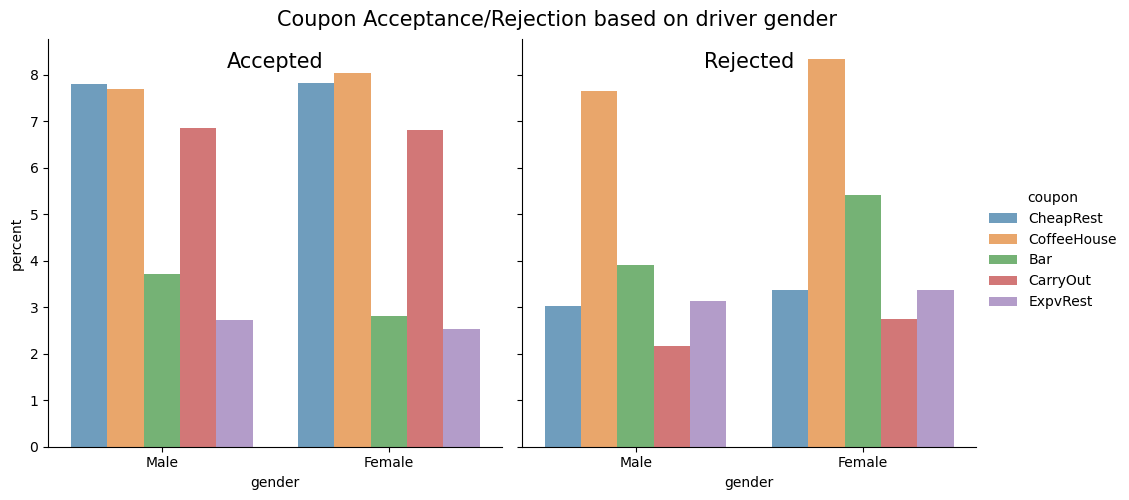

In [47]:
g = sns.catplot(data,x = 'gender', col = 'Y', kind = "count", stat = 'percent',col_order = (1, 0), col_wrap = 2,hue = 'coupon', alpha = .7);
g.fig.suptitle( 'Coupon Acceptance/Rejection based on driver gender\n', x = .5, y = .99, fontsize = 15);
for ax, title in zip(g.axes.flat, ['Accepted', 'Rejected']):
    ax.set_title(title, fontsize = 15, x = .5, y = .91)
plt.savefig('images/couponAccptRejGender.png')

<h4 style="color:red"> Drivers' Gender Impact Analysis</h4>  
<p style="color:blue">The catplot diagram shows that about ($7.5$%) of the male/female were more likely to accept the cheap restaurant, Coffee House and Carry out coupons.  About the same percent of both genders were more likely to reject the Coffee House coupon. 

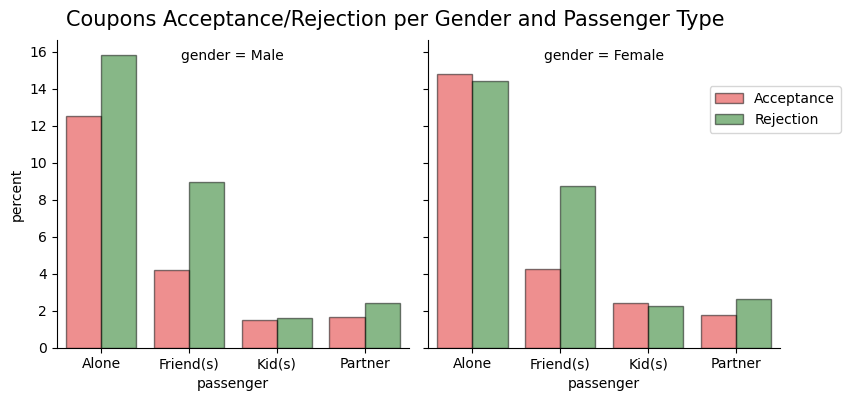

In [48]:
ax = sns.catplot(data, x = 'passenger', kind = 'count', legend = False, col = 'gender', stat = 'percent',hue = 'Y', edgecolor = 'black', height = 4, alpha = 0.5, aspect = 1, palette = sns.color_palette(['red','green']))
plt.suptitle('Coupons Acceptance/Rejection per Gender and Passenger Type', x = .5, y = .99, fontsize = 15);
plt.legend(["Acceptance", "Rejection"], loc = (.8,.7));
ax.set_titles (x = .5, y = .91)
plt.savefig('images/couponAccptRejGenderPassenger.png')


<h4 style="color:red"> Drivers' Gender and Passenger Impact Analysis</h4>  
<p style="color:blue"> The male drivers without passengers (driving Alone) were more likely to accept a coupon with a rate = ($16$%).  The same pattern with a rate of about ($12.5$%) were more likely to reject a coupon.  The female drivers without passengers were almost equally likely to accept/reject a coupon with a rate about ($15$%) 

<h3 style="color:red"> Exploring the Coffee House (CH) Conditional Probabilities</h3>  
<p style="color:blue"> Tried to answer the following conditional probability questions


Q1:  What is the probability of a driver accepting the CH coupon given that the driver had no passengers (Alone)

In [59]:
Pass_Alone_Count = data.query('passenger == "Alone"')['passenger'].value_counts()[0]
pPass_Alone_CH_Accepted = data.query('passenger == "Alone" & coupon == "CoffeeHouse"')['Y'].sum()/Pass_Alone_Count
print(pPass_Alone_CH_Accepted)


0.13508822678623084


Q2:  What is the probability of drivers without passengers (Alone) given that he/she didn't accept the Coffee House coupon

In [50]:
pPass_Alone_CH_notAccepted = data.query('passenger == "Alone" & coupon == "CoffeeHouse" & Y == 0')['Y'].value_counts()[0]/Pass_Alone_Count
print(pPass_Alone_CH_notAccepted)


0.17645357246167198


Q3: What is the probability of drivers with passengers (Friend(s)) given that the Coffee House coupon was accepted

In [51]:
Pass_Friend_Count = data.query('passenger == "Friend(s)"')['passenger'].value_counts()[0]
pPass_Friend_CH_Accepted = data.query('passenger == "Friend(s)" & coupon == "CoffeeHouse"')['Y'].sum()/Pass_Friend_Count
print(pPass_Friend_CH_Accepted)


0.22278803309993633


Q4: What is the probability of drivers with passengers (Friend(s)) given that the Coffee House coupon was not accepted

In [52]:
pPass_Friend_CH_notAccepted = data.query('passenger == "Friend(s)" & coupon == "CoffeeHouse" & Y == 0')['Y'].value_counts()[0]/Pass_Friend_Count
print(pPass_Friend_CH_notAccepted)


0.15054105665181414


Q5: What is the probability of drivers with passengers (Partner) given that the Coffee House coupon was accepted

In [53]:
Pass_Partner_Count = data.query('passenger == "Partner"')['passenger'].value_counts()[0]
pPass_Partner_CH_Accepted = data.query('passenger == "Partner" & coupon == "CoffeeHouse"')['Y'].sum()/Pass_Partner_Count
print(pPass_Partner_CH_Accepted)


0.16110019646365423


Q6: What is the probability of drivers with passengers (Partner) given that the Coffee House coupon was not accepted

In [54]:
pPass_Partner_CH_notAccepted = data.query('passenger == "Partner" & coupon == "CoffeeHouse" & Y == 0')['Y'].value_counts()[0]/Pass_Partner_Count
print(pPass_Partner_CH_notAccepted)


0.1237721021611002


Q7: What is the probability of drivers with passengers (Kid(s)) given that the Coffee House coupon was accepted

In [55]:
Pass_Kid_Count = data.query('passenger == "Kid(s)"')['passenger'].value_counts()[0]
pPass_Kid_CH_Accepted = data.query('passenger == "Kid(s)" & coupon == "CoffeeHouse"')['Y'].sum()/Pass_Kid_Count
print(pPass_Kid_CH_Accepted)


0.09646302250803858


Q8: What is the probability of drivers with passengers (Kid) given that the Coffee House coupon was not accepted

In [56]:
pPass_Kid_CH_notAccepted = data.query('passenger == "Kid(s)" & coupon == "CoffeeHouse" & Y == 0')['Y'].value_counts()[0]/Pass_Kid_Count
print(pPass_Kid_CH_notAccepted)


0.10932475884244373


<p style="color:blue"> Next is to visualize these probabilities in a bar chart.  

In [57]:
#Code to create the Coffee House conditional probabilities on passenger dataframe
total = data.groupby('passenger').size().to_frame()

dfy = pd.merge( round(data.query('Y == 1 & coupon == "CoffeeHouse"').groupby(['passenger']).size().to_frame()/total, 4), \
               round(data.query('Y == 0 & coupon == "CoffeeHouse"').groupby(['passenger']).size().to_frame()/total, 4),\
                left_on='passenger', right_on='passenger', how='outer')

dfy.rename(columns = {'0_x':'Accepted', '0_y':'Rejected'}, inplace=True);
dfy.reset_index(inplace=True)
prob = pd.melt(dfy, id_vars='passenger', var_name='Offer', value_name='Probability')
prob

,passenger,Offer,Probability
0,Alone,Accepted,0.1351
1,Friend(s),Accepted,0.2228
2,Kid(s),Accepted,0.0965
3,Partner,Accepted,0.1611
4,Alone,Rejected,0.1765
5,Friend(s),Rejected,0.1505
6,Kid(s),Rejected,0.1093
7,Partner,Rejected,0.1238


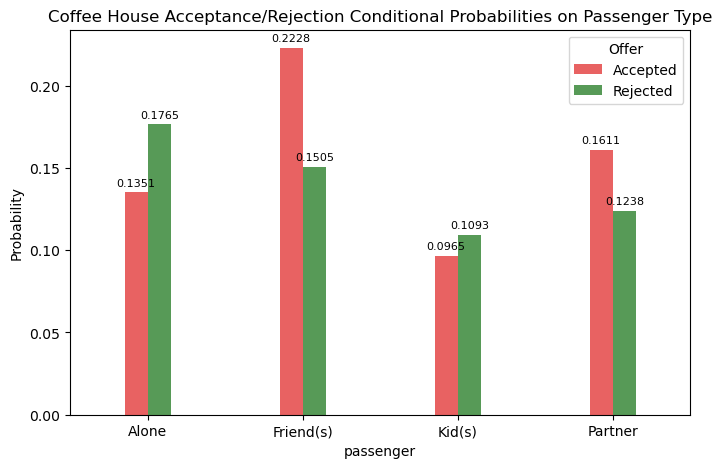

In [58]:
#Plotting the conditional prob bar chart
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(data= prob, x = 'passenger', y = 'Probability', hue = 'Offer', width = .3, alpha = .7, palette = sns.color_palette(['red','green']))
for cont in ax.containers:
    labels = [f'{h:0}' if (h:= val.get_height()) != 0 else '' for val in cont]
    ax.bar_label(cont, labels=labels, fontsize=8, padding=3)
ax.set_title('Coffee House Acceptance/Rejection Conditional Probabilities on Passenger Type');
plt.savefig('images/pCoffeeHouseCouponAccptRejPassengerType.png')


<p style="color:blue"> The conditional probabilities plot shows that the drivers with Friend passenger has the highest probability to reject the Coffee House coupon. The driver traveling without passengers (Alone) has the highest probability to accept the Coffee House coupon</p>   